# Question 5: Changes year to year

This notebook aims to answer the fifth question of the project.

Year to year:

- Has there been an overall increase or reduction in crime?

- Has a certain type of offence seen a significant decrease or increase?

## Initial setup

In [1]:
# Dependencies
from pathlib import Path 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings

warnings.simplefilter('ignore', st.ConstantInputWarning)


In [2]:
plt.style.use('bmh')


In [3]:
# Define function to get correlation from two columns of a dataframe
def corr_from_df(col_name1, col_name2, df):
    try:
        a = df[col_name1].astype(float)
        b = df[col_name2].astype(float)

        correlation = st.pearsonr(a, b)
        return correlation
    # exception handling: if there is only one value
    except ValueError:
        return [float('nan'), float('nan')]

# Define function to print correlation from two columns of a dataframe
def print_corr_from_df(col_name1, col_name2, df):
    correlation = corr_from_df(col_name1, col_name2, df)
    # because we are rounding the p value to 3 decimal places,
    # if it is less than 0.001, print that instead of the actual value
    if correlation[1] < 0.001:
        print(f"The Pearson's correlation for {col_name1} and {col_name2} is:\n\
        \t{correlation[0]:.2f}\t(p < 0.001)\n")
    else:
        print(f"The Pearson's correlation for {col_name1} and {col_name2} is:\n\
        \t{correlation[0]:.2f}\t(p = {correlation[1]:.3f})\n")

In [4]:
# Read in data
df = pd.read_csv(Path('..', 'resources', 'mci_no_duplicates_2014_and_over.csv'))

# Keep only the relevant columns, rename them and drop na
df = (df[['OCC_YEAR', 'LOCATION_TYPE', 'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY']]
    .rename(
        columns={
            'OCC_YEAR': 'Year',
            'LOCATION_TYPE': 'Location Type',
            'PREMISES_TYPE': 'Premises Type',
            'MCI_CATEGORY': 'Category',
            'OFFENCE': 'Offence',
        }
    )
)


# Make year a string and drop the .0 at the end
df['Year'] = (df['Year']
    .astype('string')
    .str.replace('.0', '',regex=False)
)
# Check dataframe
df.head()

,Year,Location Type,Premises Type,Offence,Category
0,2014,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter
1,2014,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault
2,2014,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over
3,2014,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault
4,2014,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault


## Total annual counts

In [5]:
# general counts by year
year_df = (df
    .groupby('Year', as_index=False)
    .size()
    .rename(columns={'size': 'Number of events'})
)

year_df['Percentage Change'] = (year_df['Number of events'].pct_change()) * 100

year_df

,Year,Number of events,Percentage Change
0,2014,30202,NaN
1,2015,30641,1.453546
2,2016,31157,1.684018
3,2017,32790,5.241198
4,2018,34772,6.044526
5,2019,37114,6.735304
6,2020,32456,-12.550520
7,2021,32114,-1.053734
8,2022,37226,15.918291


The Pearson's correlation for Year and Number of events is:
        	0.68	(p = 0.043)



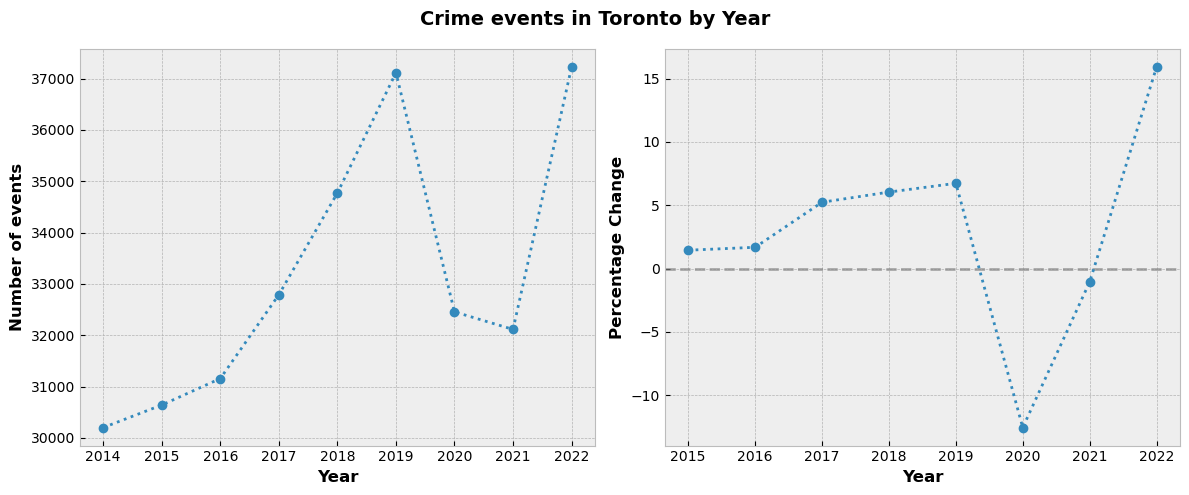

In [6]:
print_corr_from_df('Year', 'Number of events', year_df)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax2.axhline(color='grey', linestyle='--', alpha=0.65)


for ax in [ax1, ax2]:
    if ax is ax1:
        col = 'Number of events'
    else:
        col = 'Percentage Change'


    ax.plot(
        year_df['Year'],
        year_df[col],
        'o:',
        label = col
    )
    ax.set_xlabel('Year', fontdict={'weight': 700})
    ax.set_ylabel(col, fontdict={'weight': 700})

fig.suptitle(
    t='Crime events in Toronto by Year',
    fontweight=700, fontsize=14
)

plt.tight_layout()

plt.show()

## By category

In [7]:
# count by category and year
year_cat_df = (df
    .groupby(['Year', 'Category'], as_index=False)
    .size()
    .rename(columns={'size': 'Number of events'})
)

cats = list(year_cat_df['Category'].unique())

year_cat_df['Percentage Change'] = (year_cat_df['Number of events'].pct_change(periods=5)) * 100

year_cat_df.head(10)

,Year,Category,Number of events,Percentage Change
0,2014,Assault,15294,NaN
1,2014,Auto Theft,3485,NaN
2,2014,Break and Enter,7216,NaN
3,2014,Robbery,3193,NaN
4,2014,Theft Over,1014,NaN
5,2015,Assault,16547,8.192755
6,2015,Auto Theft,3090,-11.334290
7,2015,Break and Enter,6934,-3.907982
8,2015,Robbery,3028,-5.167554
9,2015,Theft Over,1042,2.761341


Category: Assault
The Pearson's correlation for Year and Number of events is:
        	0.62	(p = 0.077)

Category: Auto Theft
The Pearson's correlation for Year and Number of events is:
        	0.88	(p = 0.002)

Category: Break and Enter
The Pearson's correlation for Year and Number of events is:
        	-0.32	(p = 0.408)

Category: Robbery
The Pearson's correlation for Year and Number of events is:
        	-0.73	(p = 0.026)

Category: Theft Over
The Pearson's correlation for Year and Number of events is:
        	0.67	(p = 0.048)



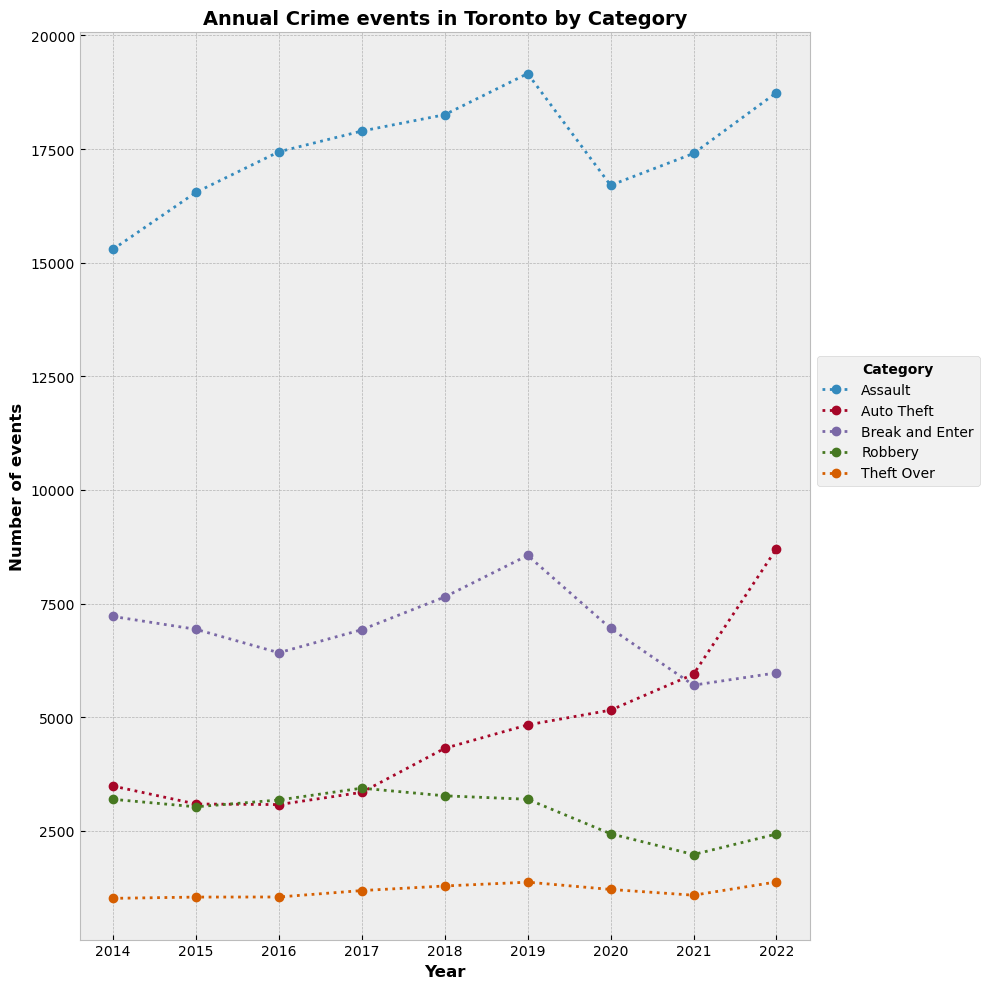

In [8]:
# Visualize
fig, ax = plt.subplots(figsize=(10,10))

ax2.axhline(color='grey', linestyle='--', alpha=0.65)

for cat in cats:
    this_data = year_cat_df.loc[year_cat_df['Category'] == cat]

    print(f"Category: {cat}")
    print_corr_from_df('Year', 'Number of events', this_data)

    # add this category to plot
    ax.plot(
        this_data['Year'],
        this_data['Number of events'],
        'o:',
        label=cat
    )


ax.set_xlabel('Year', fontdict={'weight': 700})
ax.set_ylabel('Number of events', fontdict={'weight': 700})
ax.set_title('Annual Crime events in Toronto by Category', fontdict={'weight': 700, 'size': 14})


ax.legend(
    loc=(1.01, 0.5),
    title='Category',
    title_fontproperties={'weight': 700}
)

plt.tight_layout()

plt.show()

## By subcategory

In [9]:
year_subcat_df = (df
    .groupby(['Year', 'Category', 'Offence'], as_index=False)
    .size()
    .fillna(0)
    .rename(columns={'size': 'Number of events'})
)

year_subcat_df.head()


,Year,Category,Offence,Number of events
0,2014,Assault,Administering Noxious Thing,29
1,2014,Assault,Aggravated Aslt Peace Officer,1
2,2014,Assault,Aggravated Assault,262
3,2014,Assault,Aggravated Assault Avails Pros,3
4,2014,Assault,Air Gun Or Pistol: Bodily Harm,1


### Break and Enter

Category: Break and Enter
Subcategory: B&E W'Intent
The Pearson's correlation for Year and Number of events is:
        	-0.66	(p = 0.052)



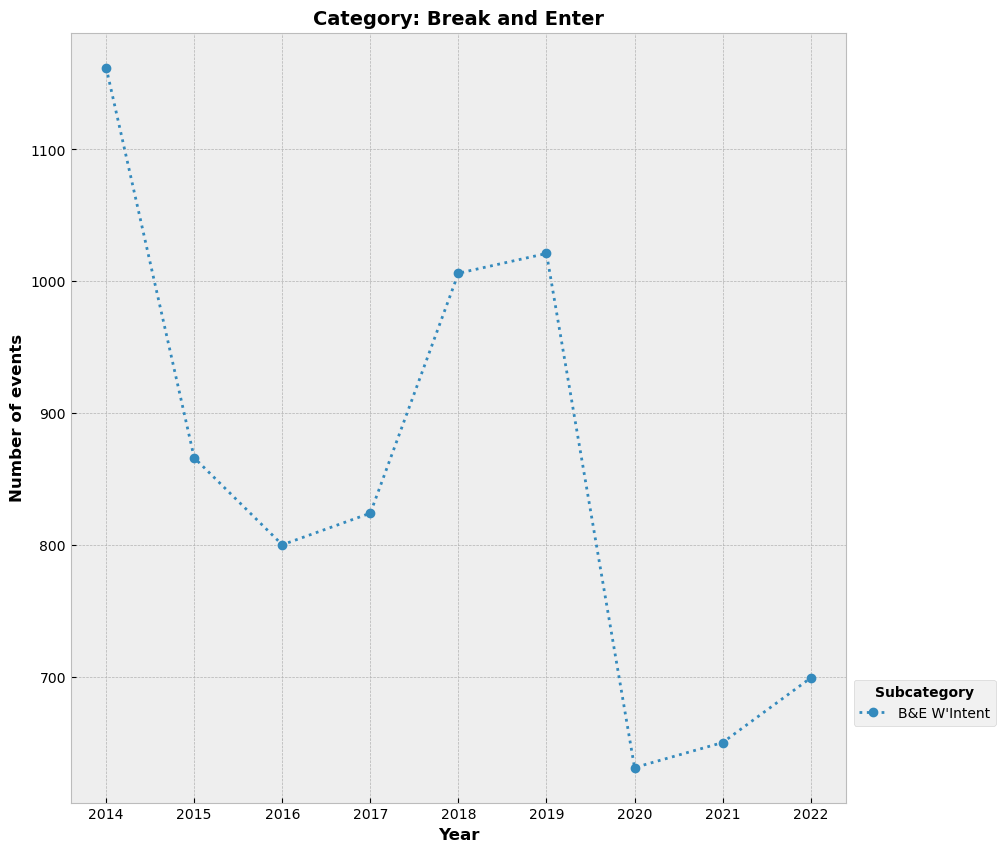

In [10]:
# Visualize
min_count = 0
# only show moderate and
limitcorr = 0.5

cat = cats[2]
this_data = year_subcat_df.loc[year_subcat_df['Category'] == cat]
print(f"Category: {cat}")
offences = list(this_data['Offence'].unique())
fig, ax = plt.subplots(1, figsize=(10, 10))
for offence in offences:
    
    this_data_off = this_data.loc[this_data['Offence'] == offence]


    if any(this_data_off['Number of events'] > min_count):
        correlation = corr_from_df('Year', 'Number of events', this_data_off)
        if correlation[0] ** 2 >= limitcorr ** 2:
            print(f"Subcategory: {offence}")
            print_corr_from_df('Year', 'Number of events', this_data_off)
            ax.plot(
                this_data_off['Year'],
                this_data_off['Number of events'],
                'o:',
                label=offence
            )
ax.legend(
    loc=(1.01, 0.1),
    title='Subcategory',
    title_fontproperties={'weight': 700}
)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    'Category: ' + cat,
    fontdict={'weight': 700, 'size': 14}
)
ax.set_xlabel('Year', fontdict={'weight': 700})

ax.set_ylabel('Number of events', fontdict={'weight': 700})

plt.show()



### Robbery

Category: Robbery
Subcategory: Robbery - Business
The Pearson's correlation for Year and Number of events is:
        	0.79	(p = 0.011)

Subcategory: Robbery - Financial Institute
The Pearson's correlation for Year and Number of events is:
        	-0.59	(p = 0.096)

Subcategory: Robbery - Home Invasion
The Pearson's correlation for Year and Number of events is:
        	-0.86	(p = 0.003)

Subcategory: Robbery - Mugging
The Pearson's correlation for Year and Number of events is:
        	-0.94	(p < 0.001)

Subcategory: Robbery - Other
The Pearson's correlation for Year and Number of events is:
        	-0.73	(p = 0.026)

Subcategory: Robbery - Purse Snatch
The Pearson's correlation for Year and Number of events is:
        	-0.94	(p < 0.001)

Subcategory: Robbery - Swarming
The Pearson's correlation for Year and Number of events is:
        	-0.91	(p < 0.001)

Subcategory: Robbery - Taxi
The Pearson's correlation for Year and Number of events is:
        	-0.83	(p = 0.006)

Subcategory

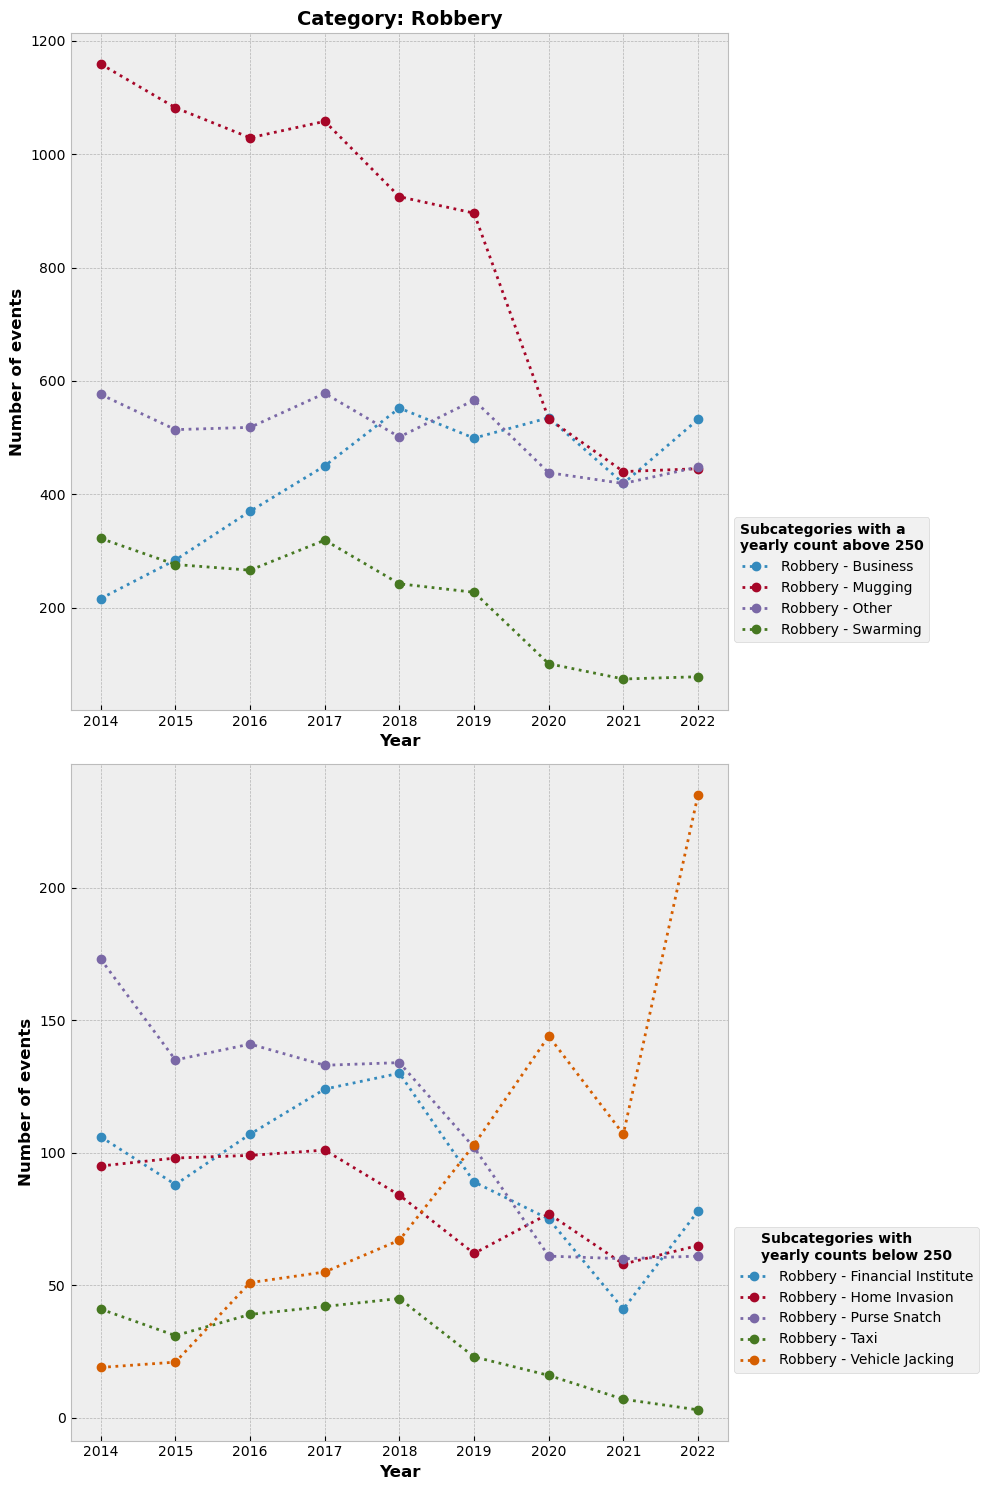

In [25]:
# Visualize
min_count = 0
mid_lim = 250
# max_count = max(year_offence_count['Number of events']) + 1
# only show moderate and
limitcorr = 0.5

cat = cats[3]
this_data = year_subcat_df.loc[year_subcat_df['Category'] == cat]
print(f"Category: {cat}")
offences = list(this_data['Offence'].unique())
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 15))
for offence in offences:
    
    this_data_off = this_data.loc[this_data['Offence'] == offence]


    if any(this_data_off['Number of events'] > min_count):
        if max(this_data_off['Number of events']) < mid_lim:
            ax = ax2
        else:
            ax = ax1


        
        correlation = corr_from_df('Year', 'Number of events', this_data_off)
        if correlation[0] ** 2 >= limitcorr ** 2:
            print(f"Subcategory: {offence}")
            print_corr_from_df('Year', 'Number of events', this_data_off)
            ax.plot(
                this_data_off['Year'],
                this_data_off['Number of events'],
                'o:',
                label=offence
            )

for ax in [ax1, ax2]:
    if ax is ax1:
        legend_title = 'Subcategories with a\nyearly count above ' + str(mid_lim)
    else:
        legend_title = 'Subcategories with \nyearly counts below ' + str(mid_lim)

    ax.legend(
        loc=(1.01, 0.1),
        title=legend_title,
        title_fontproperties={'weight': 700}
    )
    
    ax.set_ylabel(
        'Number of events' ,
        fontdict={'weight': 700}
    )
    
    
    ax.set_xlabel('Year', fontdict={'weight': 700})

ax1.set_title(
        'Category: ' + cat,
        fontdict={'weight': 700, 'size': 14}
    )

plt.tight_layout()

plt.show()



### Theft Over

Category: Theft Over 5000
Subcategory: Theft From Mail / Bag / Key
The Pearson's correlation for Year and Number of events is:
        	0.68	(p = 0.042)

Subcategory: Theft From Motor Vehicle Over
The Pearson's correlation for Year and Number of events is:
        	0.80	(p = 0.009)

Subcategory: Theft Over - Bicycle
The Pearson's correlation for Year and Number of events is:
        	-0.58	(p = 0.169)



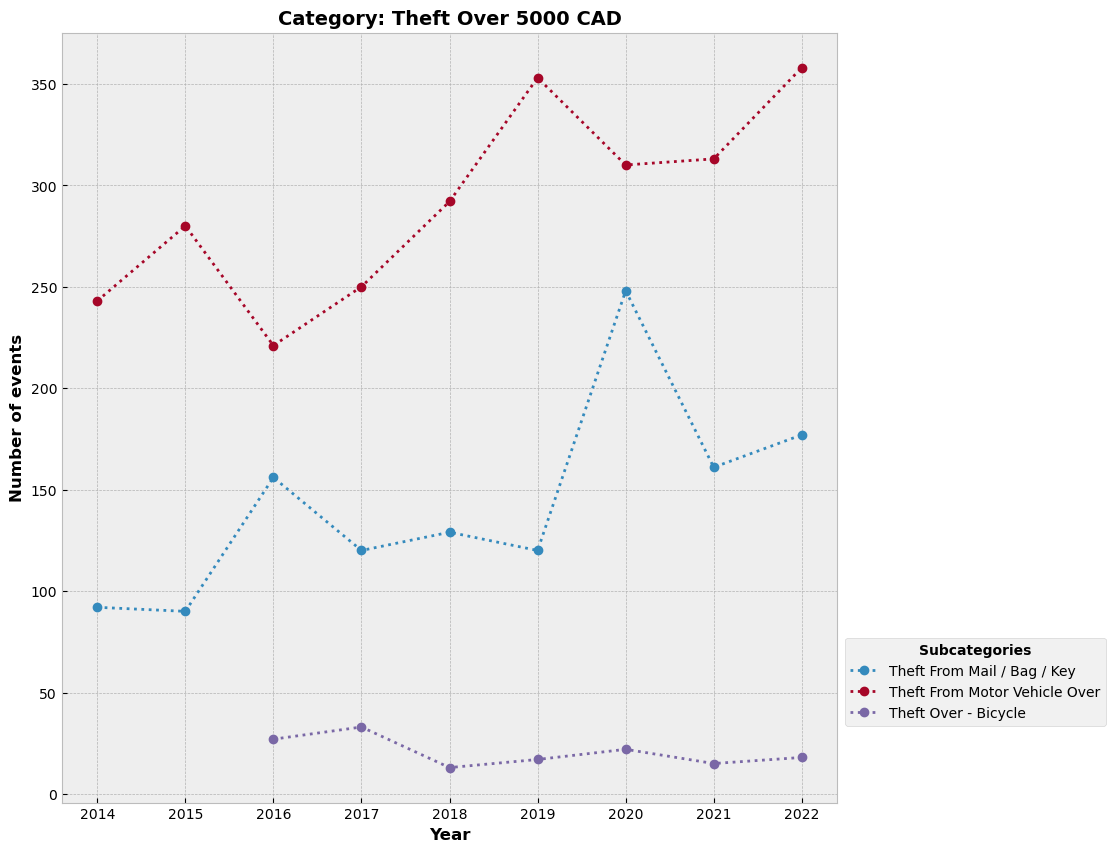

In [23]:
# Visualize

min_count = 5
# only show moderate and high correlations
limitcorr = 0.5

cat = cats[4]
this_data = year_subcat_df.loc[year_subcat_df['Category'] == cat]
print(f"Category: {cat} 5000 CAD")
offences = list(this_data['Offence'].unique())
fig, ax = plt.subplots(1, figsize=(10, 10))
for offence in offences:

    this_data_off = this_data.loc[this_data['Offence'] == offence]

    if any(this_data_off['Number of events'] > min_count):
        correlation = corr_from_df('Year', 'Number of events', this_data_off)
        if correlation[0] ** 2 >= limitcorr ** 2:
            print(f"Subcategory: {offence}")
            print_corr_from_df('Year', 'Number of events', this_data_off)
            ax.plot(
                this_data_off['Year'],
                this_data_off['Number of events'],
                'o:',
                label=offence
            )
ax.legend(loc=(1.01, 0.1), title='Subcategories', title_fontproperties={'weight': 700})

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    'Category: ' + cat + ' 5000 CAD',
    fontdict={'weight': 700, 'size': 14}
)
ax.set_xlabel('Year', fontdict={'weight': 700})

ax.set_ylabel('Number of events', fontdict={'weight': 700})

plt.show()



## By premises type

In [13]:
year_premises_df = (df
    .groupby(['Year', 'Premises Type'], as_index=False)
    .size()
    .fillna(0)
    .rename(columns={'size': 'Number of events'})
)

year_premises_df

,Year,Premises Type,Number of events
0,2014,Apartment,7421
1,2014,Commercial,5452
2,2014,Educational,942
3,2014,House,6196
4,2014,Other,1554
...,...,...,...
58,2022,Educational,734
59,2022,House,6805
60,2022,Other,2398
61,2022,Outside,10273


Premises type: Apartment
The Pearson's correlation for Year and Number of events is:
        	0.52	(p = 0.155)

Premises type: Commercial
The Pearson's correlation for Year and Number of events is:
        	0.59	(p = 0.092)

Premises type: Educational
The Pearson's correlation for Year and Number of events is:
        	-0.62	(p = 0.075)

Premises type: House
The Pearson's correlation for Year and Number of events is:
        	0.09	(p = 0.818)

Premises type: Other
The Pearson's correlation for Year and Number of events is:
        	0.86	(p = 0.003)

Premises type: Outside
The Pearson's correlation for Year and Number of events is:
        	0.71	(p = 0.032)

Premises type: Transit
The Pearson's correlation for Year and Number of events is:
        	0.96	(p < 0.001)



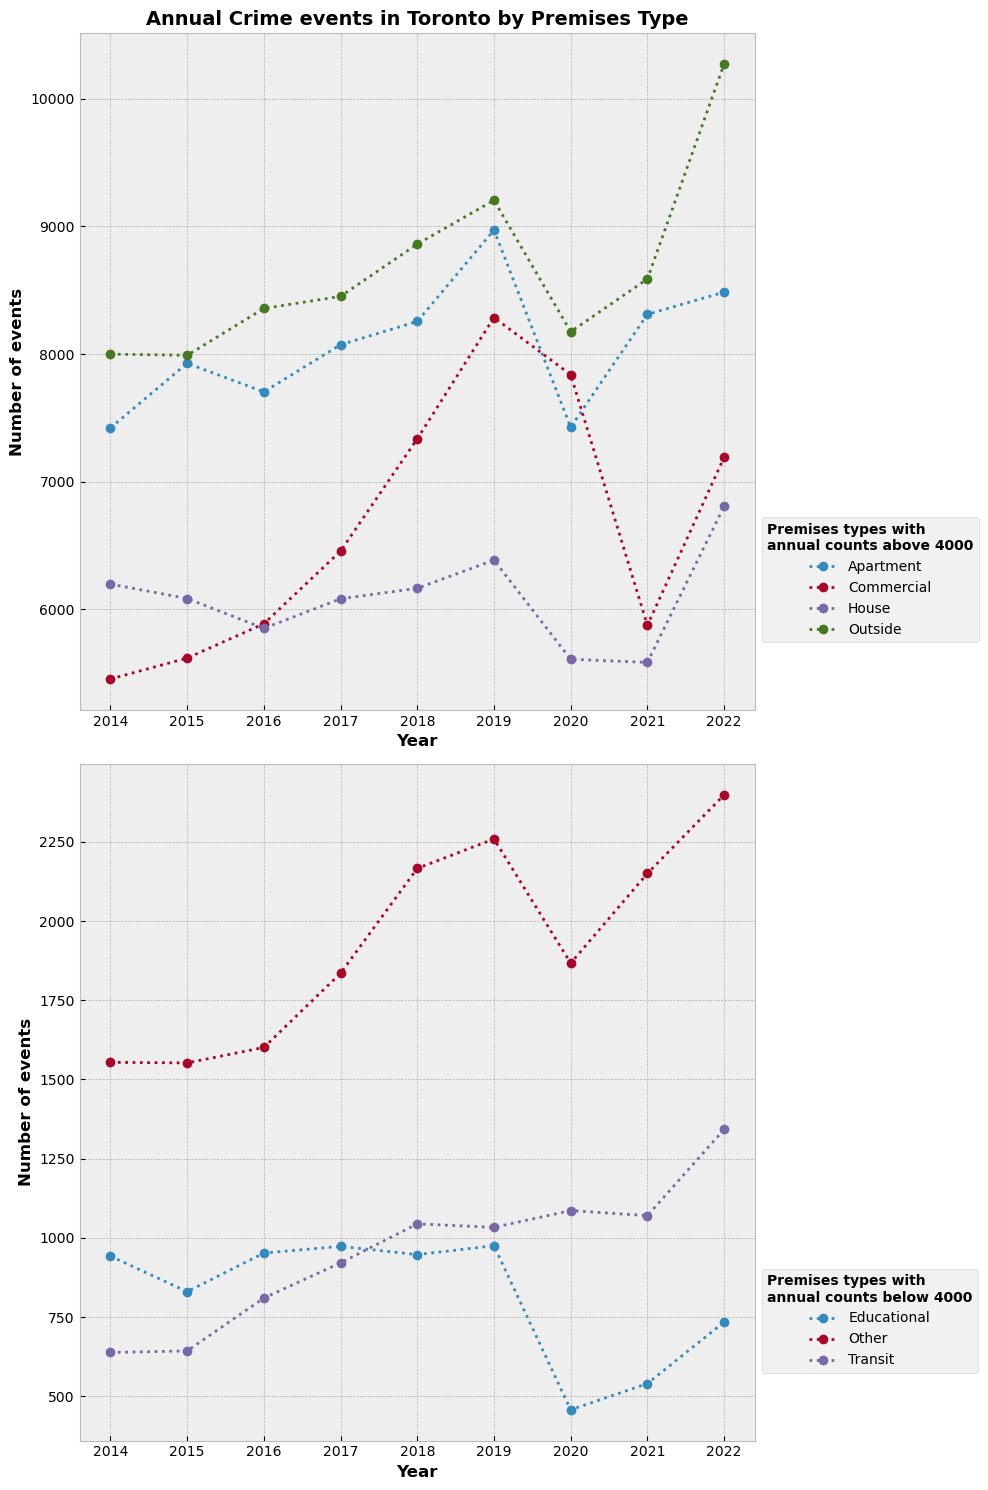

In [22]:
# Visualize

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 15))


mid_lim = 4000

# List of premises types
premises = list(year_premises_df['Premises Type'].unique())

for idx, prem in enumerate(premises):
    this_data = year_premises_df.loc[year_premises_df['Premises Type'] == prem]

    
    print(f"Premises type: {prem}")
    print_corr_from_df('Year', 'Number of events', this_data)



    if max(this_data['Number of events']) < mid_lim:
        ax = ax2
    else:
        ax = ax1

    ax.plot(
        this_data['Year'],
        this_data['Number of events'],
        'o:',
        label=prem
    )
for ax in [ax1, ax2]:
    if ax is ax1:
        direction = ' above '
    else:
        direction = ' below '

    ax.legend(
        loc=(1.01, 0.1),
        title='Premises types with\nannual counts' + direction + str(mid_lim),
        title_fontproperties={'weight': 700}
    )
    
    ax.set_ylabel(
        'Number of events' ,
        fontdict={'weight': 700}
    )
    
    
    ax.set_xlabel('Year', fontdict={'weight': 700})



ax1.set_title(
    'Annual Crime events in Toronto by Premises Type',
    fontdict={'weight': 700, 'size': 14}
)

plt.tight_layout()
# fig.subplots_adjust(hspace=0)

plt.show()



## By location type

In [15]:
year_loc_df = (df
    .groupby(['Year', 'Premises Type', 'Location Type'], as_index=False)
    .size()
    .fillna(0)
    .rename(columns={'size': 'Number of events'})
)
premises = list(year_loc_df['Premises Type'].unique())
year_loc_df

,Year,Premises Type,Location Type,Number of events
0,2014,Apartment,"Apartment (Rooming House, Condo)",7421
1,2014,Commercial,Bank And Other Financial Institutions (Money M...,191
2,2014,Commercial,Bar / Restaurant,1278
3,2014,Commercial,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",395
4,2014,Commercial,"Construction Site (Warehouse, Trailer, Shed)",193
...,...,...,...,...
437,2022,Transit,Ttc Street Car,71
438,2022,Transit,Ttc Subway Station,599
439,2022,Transit,Ttc Subway Train,175
440,2022,Transit,Ttc Subway Tunnel / Outdoor Tracks,4


### Commercial

Premises Type: Commercial
Location type: Construction Site (Warehouse, Trailer, Shed)
The Pearson's correlation for Year and Number of events is:
        	0.85	(p = 0.004)

Location type: Convenience Stores
The Pearson's correlation for Year and Number of events is:
        	0.66	(p = 0.053)

Location type: Dealership (Car, Motorcycle, Marine, Trailer, Etc.)
The Pearson's correlation for Year and Number of events is:
        	0.80	(p = 0.010)

Location type: Gas Station (Self, Full, Attached Convenience)
The Pearson's correlation for Year and Number of events is:
        	0.88	(p = 0.002)



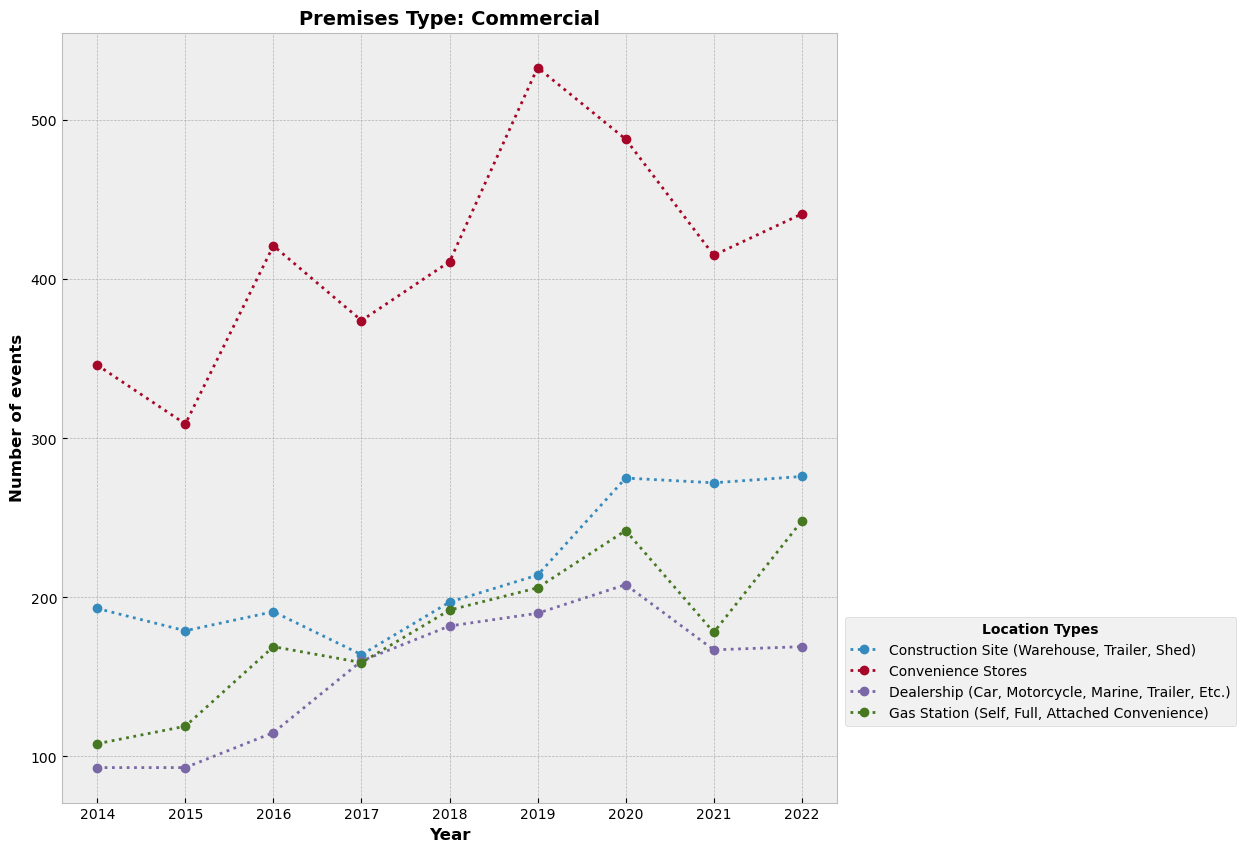

In [16]:
# Visualize
max_count = 2000
# only show moderate and
limitcorr = 0.5

prem = premises[1]
this_data = year_loc_df.loc[year_loc_df['Premises Type'] == prem]
print(f"Premises Type: {prem}")

locations = list(this_data['Location Type'].unique())
fig, ax = plt.subplots(1, figsize=(10, 10))
for location in locations:
    this_data_location = this_data.loc[this_data['Location Type'] == location]

    if any(this_data_location['Number of events'] < max_count):
        correlation = corr_from_df('Year', 'Number of events', this_data_location)
        if correlation[0] ** 2 >= limitcorr ** 2:
            print(f"Location type: {location}")
            print_corr_from_df('Year', 'Number of events', this_data_location)
            # add this offence to plot
            ax.plot(
                this_data_location['Year'],
                
                this_data_location['Number of events'],
                'o:',
                label=location
            )

ax.legend(loc=(1.01, 0.1), title='Location Types', title_fontproperties={'weight': 700})

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    'Premises Type: ' + prem,
    fontdict={'weight': 700, 'size': 14}
)
ax.set_xlabel('Year', fontdict={'weight': 700})

ax.set_ylabel('Number of events', fontdict={'weight': 700})

plt.show()


### Educational

Premises Type: Educational
Location type: Schools During Supervised Activity
The Pearson's correlation for Year and Number of events is:
        	-0.60	(p = 0.089)

Location type: Schools During Un-Supervised Activity
The Pearson's correlation for Year and Number of events is:
        	-0.72	(p = 0.030)



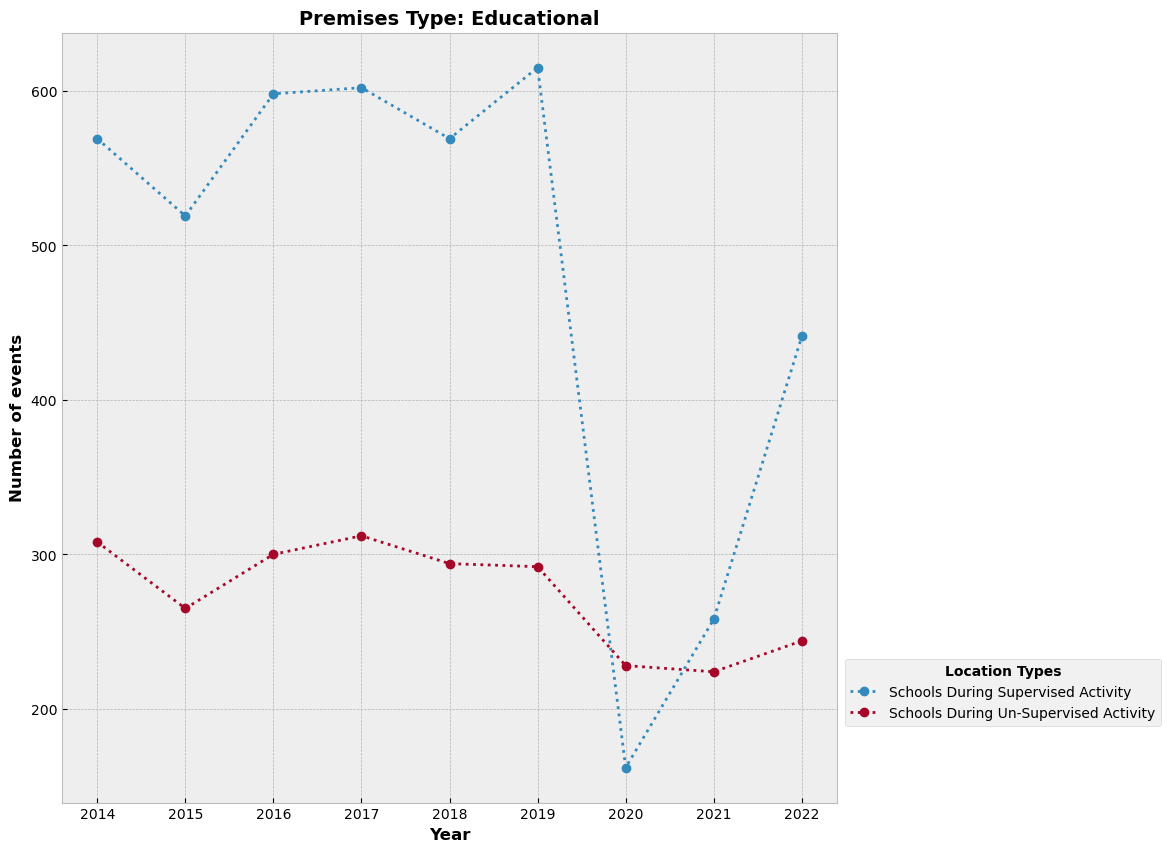

In [17]:
# Visualize
min_count = 100
# only show moderate and
limitcorr = 0.5

prem = premises[2]
this_data = year_loc_df.loc[year_loc_df['Premises Type'] == prem]
print(f"Premises Type: {prem}")

locations = list(this_data['Location Type'].unique())
fig, ax = plt.subplots(1, figsize=(10, 10))
for location in locations:
    this_data_location = this_data.loc[this_data['Location Type'] == location]

    if any(this_data_location['Number of events'] > min_count):
        correlation = corr_from_df('Year', 'Number of events', this_data_location)
        if correlation[0] ** 2 >= limitcorr ** 2:
            print(f"Location type: {location}")
            print_corr_from_df('Year', 'Number of events', this_data_location)
            # add this offence to plot
            ax.plot(
                this_data_location['Year'],
                this_data_location['Number of events'],
                'o:',
                label=location
            )

ax.legend(loc=(1.01, 0.1), title='Location Types', title_fontproperties={'weight': 700})

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    'Premises Type: ' + prem,
    fontdict={'weight': 700, 'size': 14}
)
ax.set_xlabel('Year', fontdict={'weight': 700})

ax.set_ylabel('Number of events', fontdict={'weight': 700})

plt.show()


### Other premises type

Premises Type: Other
Location type: Group Homes (Non-Profit, Halfway House, Social Agency)
The Pearson's correlation for Year and Number of events is:
        	-0.47	(p = 0.199)

Location type: Homeless Shelter / Mission
The Pearson's correlation for Year and Number of events is:
        	0.92	(p < 0.001)

Location type: Private Property Structure (Pool, Shed, Detached Garage)
The Pearson's correlation for Year and Number of events is:
        	0.92	(p < 0.001)

Location type: Pharmacy
The Pearson's correlation for Year and Number of events is:
        	0.95	(p < 0.001)

Location type: Nursing Home
The Pearson's correlation for Year and Number of events is:
        	-0.75	(p = 0.086)



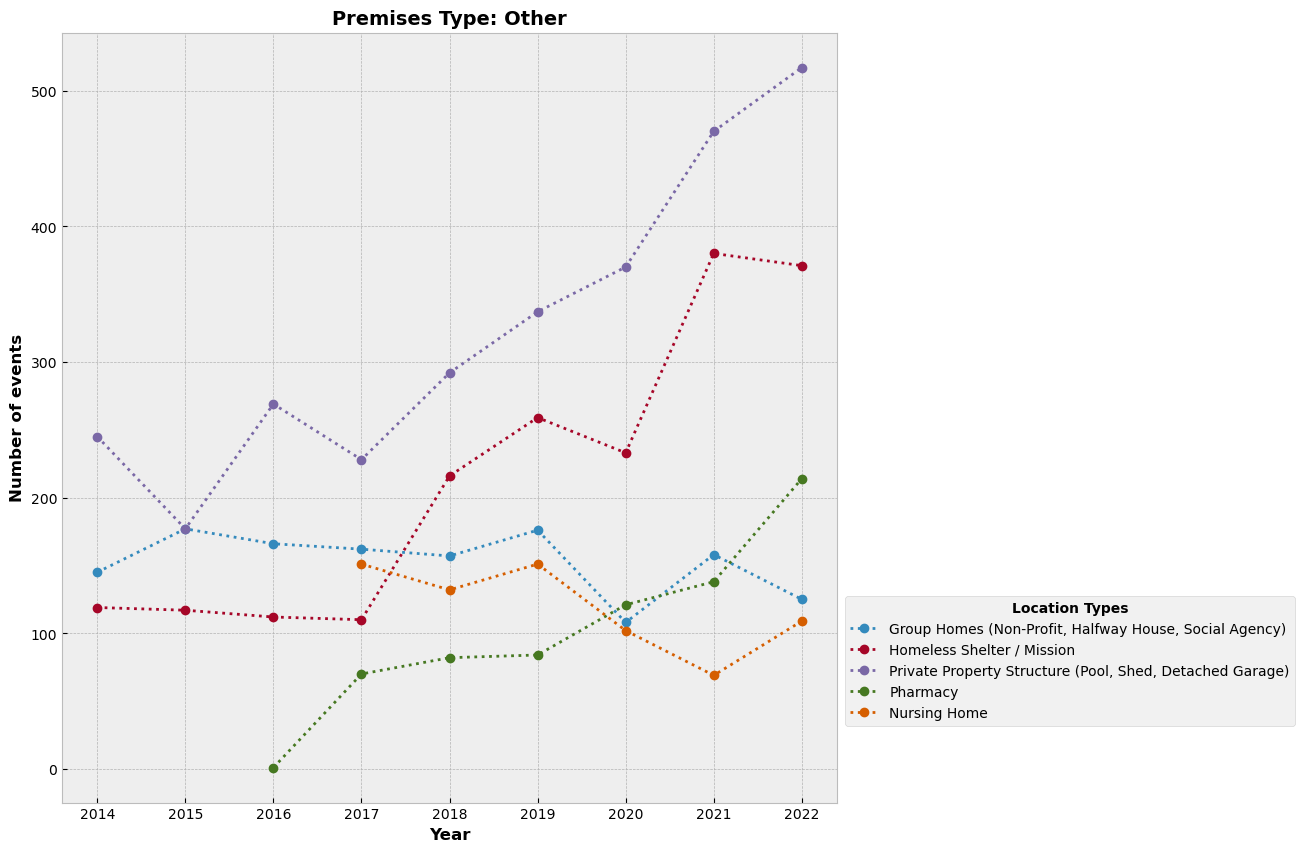

In [18]:
# Visualize
min_count = 125
# only show moderate and
limitcorr = 0.45

prem = premises[4]
this_data = year_loc_df.loc[year_loc_df['Premises Type'] == prem]
print(f"Premises Type: {prem}")

locations = list(this_data['Location Type'].unique())
fig, ax = plt.subplots(1, figsize=(10, 10))
for location in locations:
    this_data_location = this_data.loc[this_data['Location Type'] == location]

    if any(this_data_location['Number of events'] > min_count):
        correlation = corr_from_df('Year', 'Number of events', this_data_location)
        if correlation[0] ** 2 >= limitcorr ** 2:
            print(f"Location type: {location}")
            print_corr_from_df('Year', 'Number of events', this_data_location)
            # add this offence to plot
            ax.plot(
                this_data_location['Year'],
                this_data_location['Number of events'],
                'o:',
                label=location
            )

ax.legend(loc=(1.01, 0.1), title='Location Types', title_fontproperties={'weight': 700})

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    'Premises Type: ' + prem,
    fontdict={'weight': 700, 'size': 14}
)
ax.set_xlabel('Year', fontdict={'weight': 700})

ax.set_ylabel('Number of events', fontdict={'weight': 700})

plt.show()


### Outside

Premises Type: Outside
Location type: Open Areas (Lakes, Parks, Rivers)
The Pearson's correlation for Year and Number of events is:
        	-0.59	(p = 0.093)

Location type: Parking Lots (Apt., Commercial Or Non-Commercial)
The Pearson's correlation for Year and Number of events is:
        	0.76	(p = 0.017)



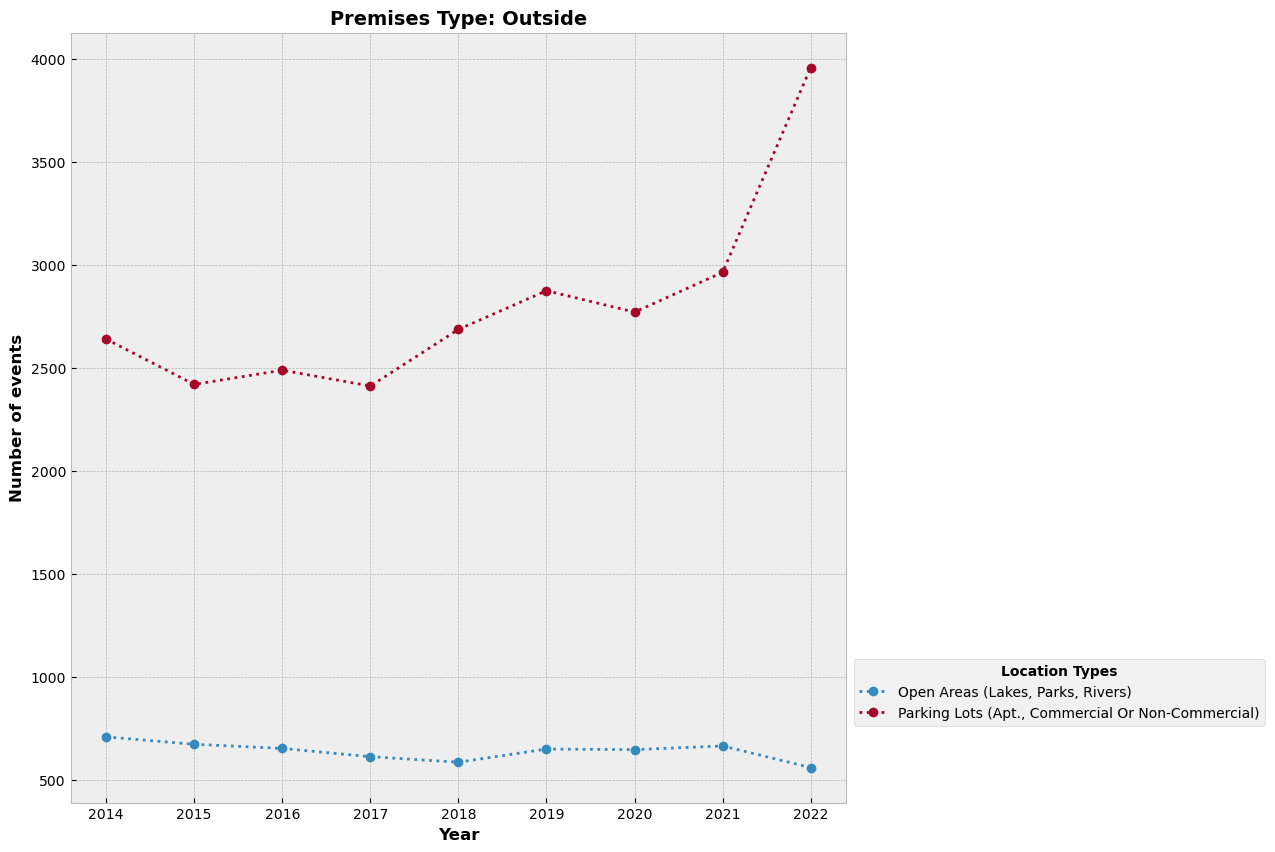

In [19]:
# Visualize
min_count = 0
# only show moderate and
limitcorr = 0.5

prem = premises[5]
this_data = year_loc_df.loc[year_loc_df['Premises Type'] == prem]
print(f"Premises Type: {prem}")

locations = list(this_data['Location Type'].unique())
fig, ax = plt.subplots(1, figsize=(10, 10))
for location in locations:
    this_data_location = this_data.loc[this_data['Location Type'] == location]

    if any(this_data_location['Number of events'] > min_count):
        correlation = corr_from_df(
            'Year', 'Number of events', this_data_location)
        if correlation[0] ** 2 >= limitcorr ** 2:
            print(f"Location type: {location}")
            print_corr_from_df('Year', 'Number of events', this_data_location)
            # add this offence to plot
            ax.plot(
                this_data_location['Year'],
                this_data_location['Number of events'],
                'o:',
                label=location
            )

ax.legend(loc=(1.01, 0.1), title='Location Types', title_fontproperties={'weight': 700})

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    'Premises Type: ' + prem,
    fontdict={'weight': 700, 'size': 14}
)
ax.set_xlabel('Year', fontdict={'weight': 700})

ax.set_ylabel('Number of events', fontdict={'weight': 700})

plt.show()


### Transit

Premises Type: Transit
Location type: Go Station
The Pearson's correlation for Year and Number of events is:
        	0.72	(p = 0.027)

Location type: Ttc Bus
The Pearson's correlation for Year and Number of events is:
        	0.71	(p = 0.032)

Location type: Ttc Street Car
The Pearson's correlation for Year and Number of events is:
        	0.72	(p = 0.027)

Location type: Ttc Subway Station
The Pearson's correlation for Year and Number of events is:
        	0.96	(p < 0.001)

Location type: Ttc Subway Train
The Pearson's correlation for Year and Number of events is:
        	0.89	(p = 0.001)



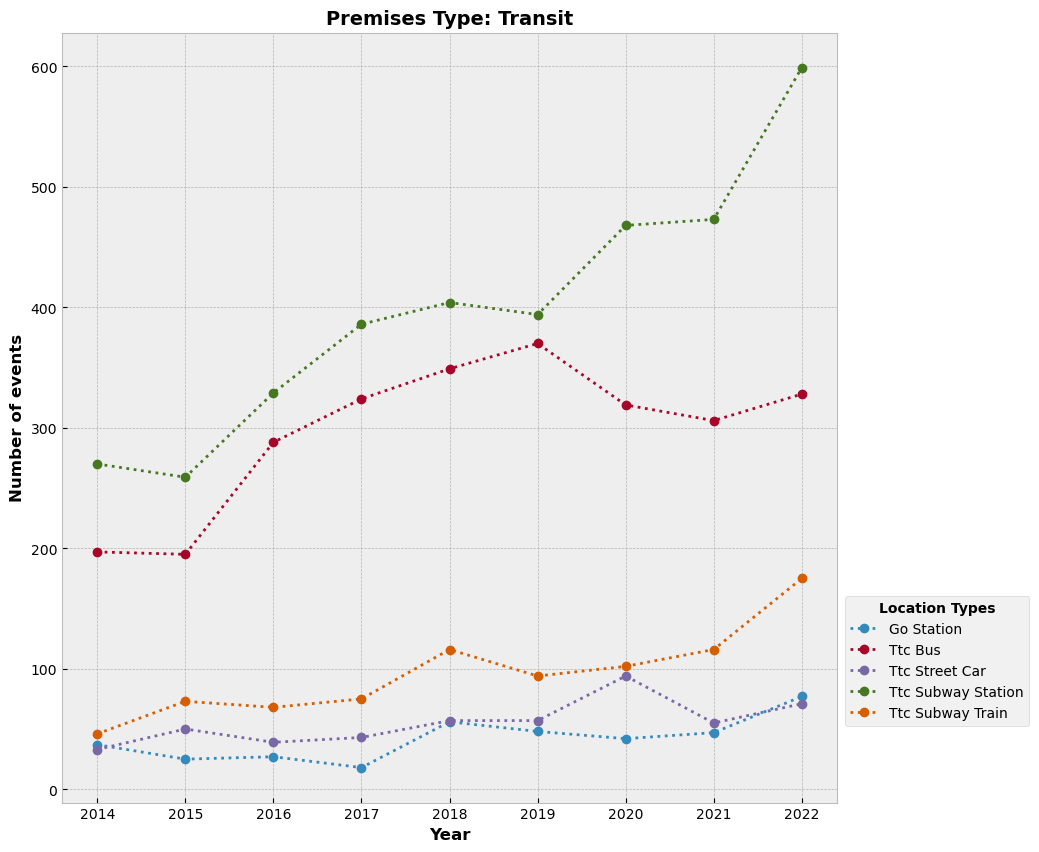

In [20]:
# Visualize
min_count = 30
# only show moderate and
limitcorr = 0.5

prem = premises[6]
this_data = year_loc_df.loc[year_loc_df['Premises Type'] == prem]
print(f"Premises Type: {prem}")

locations = list(this_data['Location Type'].unique())
fig, ax = plt.subplots(1, figsize=(10, 10))
for location in locations:
    this_data_location = this_data.loc[this_data['Location Type'] == location]

    if any(this_data_location['Number of events'] > min_count):
        correlation = corr_from_df('Year', 'Number of events', this_data_location)
        if correlation[0] ** 2 >= limitcorr ** 2:
            print(f"Location type: {location}")
            print_corr_from_df('Year', 'Number of events', this_data_location)
            # add this offence to plot
            ax.plot(
                this_data_location['Year'],
                this_data_location['Number of events'],
                'o:',
                label=location
            )

ax.legend(loc=(1.01, 0.1), title='Location Types', title_fontproperties={'weight': 700})

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    'Premises Type: ' + prem,
    fontdict={'weight': 700, 'size': 14}
)
ax.set_xlabel('Year', fontdict={'weight': 700})

ax.set_ylabel('Number of events', fontdict={'weight': 700})

plt.show()
